In [42]:
import import_ipynb
import seaborn as sns
import numpy as np
import pandas as pd
import pyvinecopulib as pv
import scipy
import seaborn as sns
from scipy.stats import nct, laplace_asymmetric ,genhyperbolic, laplace , t
import pandas_ta as ta

In [47]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.processing import HistoricalPrice, RandomVariable
from utils.yield_spread import get_us_yield

In [48]:
def feature_engineer(df: pd.DataFrame) -> pd.DataFrame:
    df['vwma'] = df.ta.vwma(lenght=5)
    df['vwma_10'] = df.ta.vwma(length=10)
    df['vwma_20'] = df.ta.vwma(length=20)
    
    df['obv'] = df.ta.obv()
    df['rsi'] = df.ta.rsi()
    # df[['adx','dmp','dmn']] = df.ta.adx()
    # df[['macd','macd_histogram','macd_signal']] = df.ta.macd()
    return df.dropna()


In [58]:
asset = 'VNM'
hp = HistoricalPrice()

## CANDIATES: MSN, VNM, MIG, LIX, DHG 
file = f"../data/{asset}_historical_price.csv"
order = f"../data/{asset}_historical_order.csv"
df = hp.read(file)
df = df.loc[:,[i for i in df.columns if 'order' not in i]]
order = hp.get_order_info(order)

order = order.replace(0, np.nan).interpolate()
order = order.replace(np.inf, np.nan).interpolate()
df = df.join(order).dropna()
df.index =  pd.to_datetime(df.index)
# df.index = pd.DatetimeIndex(df.index).to_period('D')
# df['net_volume'] = df['ChenhLechKL']

# # df = df.drop(columns=['SoLenhMua','KLTB1LenhBan','KLTB1LenhMua','SoLenhDatBan'])
# # print(df.shape)
df.head()

(4472, 10)


,adj_close,close,order_matching_volume,order_matching_value,order_negotiated_volume,order_negotiated_value,open,high,low,volume
date,,,,,,,,,,
2006-01-19,53.0,53.0,109350,5795550,0,0,53.0,53.0,53.0,109350
2006-01-20,54.0,54.0,157840,8616000,0,0,55.0,55.0,54.0,157840
2006-01-23,52.5,52.5,81400,4327995,28000,1467650,54.0,54.0,52.5,109400
2006-01-24,52.0,52.0,66000,3439440,20000,998000,52.5,52.5,52.0,86000
2006-01-25,53.0,53.0,57220,3010450,0,0,52.0,53.0,52.0,57220


In [40]:
df.index = df.index.to_timestamp()
df = df.sort_index()

df['vwma_5'] = df.ta.vwma(length=5)
df['vwma_20'] = df.ta.vwma(length=20)
df['vwma_60'] = df.ta.vwma(length=60)

# ### SLOPE OF CLOSE PRICE HAS to BE SMOOTHED OUT 
# df['slope_5'] = df.ta.slope(5)
# df['slope_20'] = df.ta.slope(20)
# df['slope_60'] = df.ta.slope(60)

# df['secondorder_slope_5']  = df['slope_5'] - df['slope_5'].shift(1)
# df['secondorder_slope_20']  = df['slope_20'] - df['slope_20'].shift(1)
# df['secondorder_slope_60']  = df['slope_60'] - df['slope_60'].shift(1)
# df['slope_20'] = df.ta.slope(20)

df['obv'] = df.ta.obv()
# df['rsi'] = df.ta.rsi(200)
df['rsi'] = df.ta.rsi(20)
# df['mfi'] = df.ta.mfi(60)
# df[['macd','macd_histogram','macd_signal']] = df.ta.macd()
# df['vwma_dev'] = df['close'] -df['vwma']
# df['vwma_dev_10'] = df['close'] -df['vwma_10']
# df['vwma_dev_20'] = df['close'] -df['vwma_20']
# df['vwma_dev_50'] = df['close'] -df['vwma_40']
# df = feature_engineer(df)
df.head()

,adj_close,close,open,high,low,volume,KLDatMua,KLDatBan,ChenhLechKL,net_volume,vwma_5,vwma_20,vwma_60,obv,rsi
2023-07-05,75.8,75.8,75.9,76.3,75.5,5298800,2148000.0,2369800.0,-221800.0,-221800.0,NaN,NaN,NaN,5298800.0,NaN
2023-07-06,76.0,76.0,75.5,76.1,75.5,964100,1621400.0,1687800.0,-66400.0,-66400.0,NaN,NaN,NaN,6262900.0,NaN
2023-07-07,75.2,75.2,76.2,76.2,75.2,1421500,2044400.0,2188600.0,-144200.0,-144200.0,NaN,NaN,NaN,4841400.0,NaN
2023-07-10,77.9,77.9,75.4,77.9,75.4,2345800,4395400.0,3398000.0,997400.0,997400.0,NaN,NaN,NaN,7187200.0,NaN
2023-07-11,79.2,79.2,78.1,80.1,78.1,3569800,5350300.0,4526200.0,824100.0,824100.0,77.006134,NaN,NaN,10757000.0,NaN


IndexError: index -1 is out of bounds for axis 0 with size 0

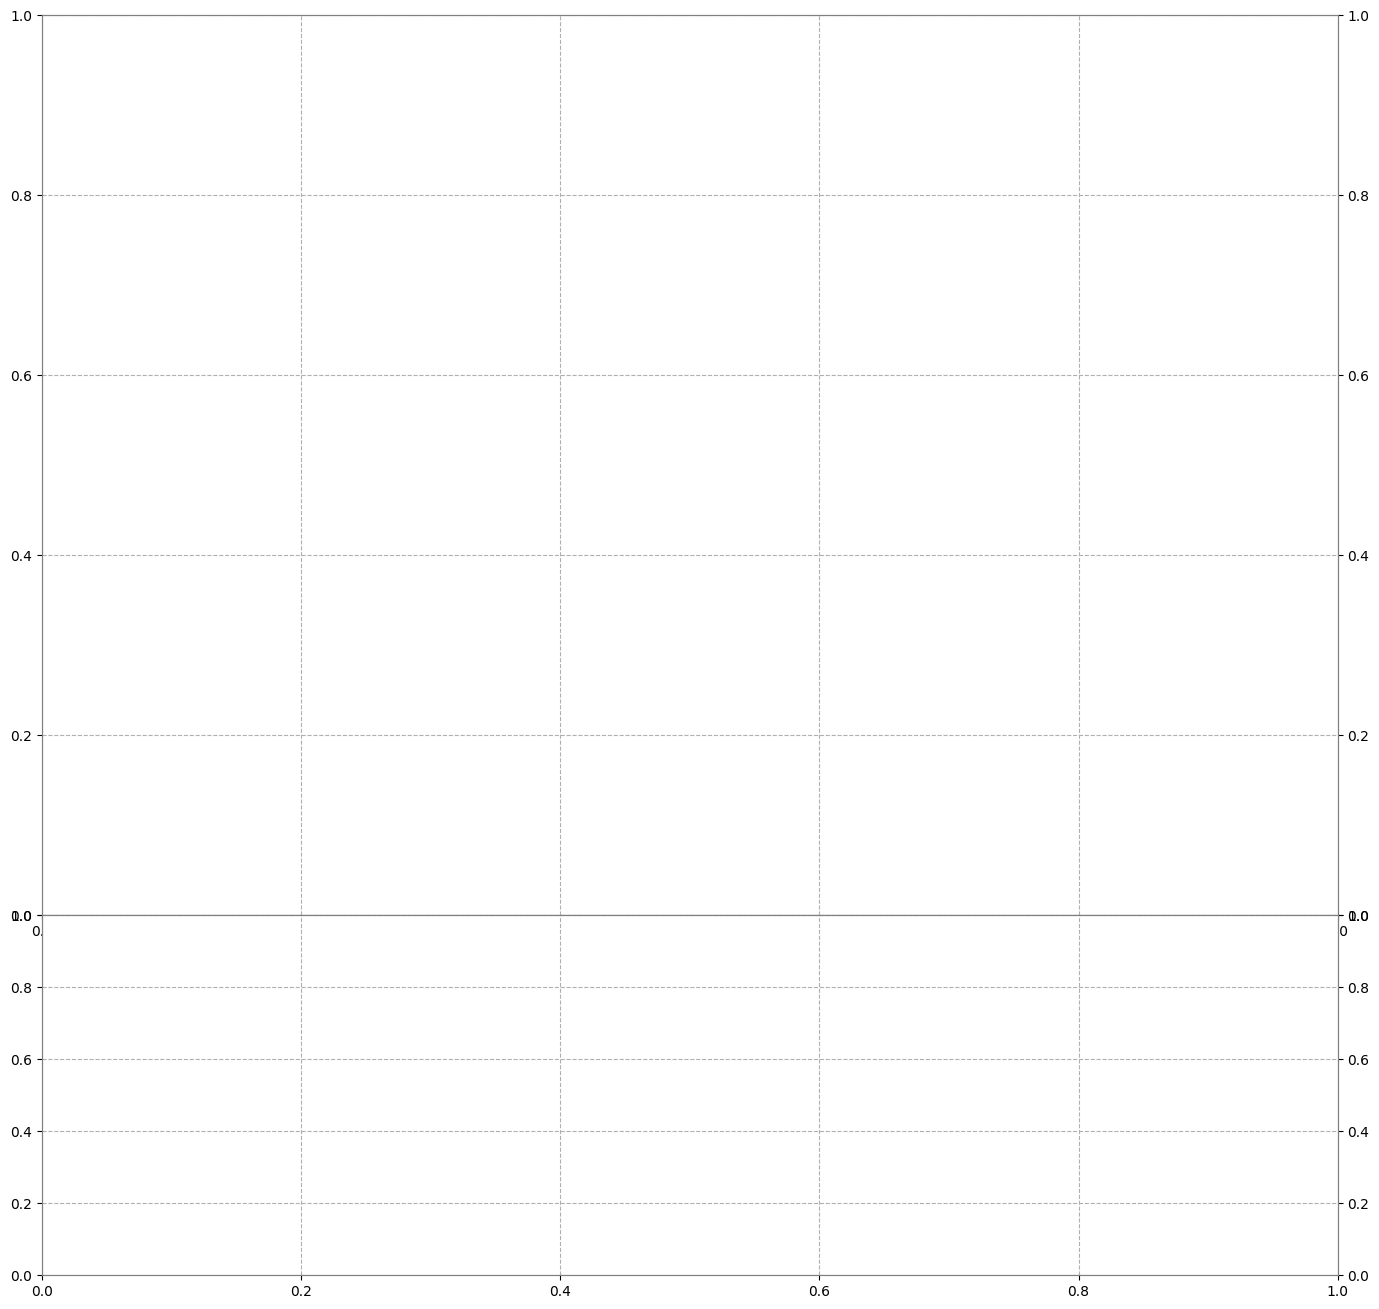

In [41]:
import mplfinance as fplt

start_date = '06-01-2010'
end_date = '12-01-2022'

temp = df.copy().loc[start_date:end_date,:]
# temp['atr'] = temp.ta.atr(5)
temp['volume'] = temp['net_volume']

min_vol = temp['volume'].min()*1.1
max_vol = temp['volume'].max()*1.1

# bull_period = temp.loc[temp['states']==0,'close']
# bear_period = temp.loc[temp['states']==1,'close']
# regimes = pd.concat([bull_period,bear_period],axis=1)
# regimes.columns=['bull','bear']

apds = [ fplt.make_addplot(temp[['vwma_5','vwma_20','vwma_60']], type='line'),
         # fplt.make_addplot(regimes['bull'],type='scatter',markersize=20,marker='^'),
        # fplt.make_addplot(regimes['bear'],type='scatter',markersize=20,marker='v'),
        fplt.make_addplot(temp['rsi'], type='line',secondary_y=True,panel=1),
       ]

fig, axes = fplt.plot(
            temp,
            style='tradingview',
            figsize=(18,18),
            volume=True,
            volume_ylim=(min_vol,max_vol),
            type='candle',
            addplot=apds,
            returnfig=True
        )

labels = apds[0]['data'].columns.tolist() + [apds[1]['data'].name] + [apds[2]['data'].name]
axes[0].legend([None]*(len(labels)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:],labels=labels)
axes[3].set_ylabel('mfi')
## red candlestick = close < open 
## green candlestick = close > open
### net volume = buy - sell 
### net volume < 0 ==> buy < sell
### net volume > 0 ==> buy > sell 

In [ ]:
temp['relative_price_range'] = (temp['close'] - temp['open'])/temp['atr'].shift()
temp['relative_net_volume'] = temp['net_volume']/temp['net_volume'].shift().rolling(window=5).mean()/1000
print(temp.shape)
temp = temp.dropna(subset=['relative_price_range','relative_net_volume'])
temp=  temp.loc[np.abs(temp['relative_price_range'])>=0.02]
print(temp.shape)
# np.quantile(temp['relative_net_volume'],0.7)
# np.quantile(temp['relative_net_volume'],0.1)
# plt.scatter(temp['price_range'],temp['net_volume'])
# temp_rel
# temp
plt.scatter(temp['relative_price_range'],temp['relative_net_volume'])
# plt.plot(temp['relative_net_volume'])
# plt.plot(temp['relative_price_range'])

In [28]:


####### BULL MARKET STRATEGY
#### SELL MORE OFTEN, BUY RARELY BUT ONLY WHEN THERE ARE SOME SHARP DIPS
#### AT THE TOP, SELL_ALL just before transitionning into BEAR MARKET

cols = ['volume','mfi','states','open','close','high','low','vwma_5','vwma_20','vwma_60','slope_5','slope_20','slope_60','secondorder_slope_5','secondorder_slope_20','secondorder_slope_60']
ma = df.copy().loc[:,cols].dropna()
ma['diff_close_vwma5'] = ma['close']/ma['vwma_5'] - 1
ma['diff_close_vwma20'] = ma['close']/ma['vwma_20'] - 1
ma['diff_close_vwma60'] = ma['close']/ma['vwma_60'] - 1


## SELL SIGNAL BASED on considering VWMA5 & VWMA60 simultaneously
## WANT TO SELL AT THE TOP WHEN
## 1) AFTER IT PEAKS AND SLOW DOWN (SMALL POSITIVE SLOPE)
### &&& around the 2nd order derivative or inflection point (SLOPE ABOUT TO CHANGE SIGN) 
### 2) OR SOMETIMES THERE IS SUDDEN CHANGE IN DIRECTION AFTER a few consecutive sharp slopes (no inflecion point)
## &&& and the slope of close itself, such that we dont sell right after a sharp price drop

bull_state = 0
bull = (ma['states'].shift(1)==bull_state)&(ma['states'].shift(2)==bull_state)&(ma['states'].shift(3)==bull_state)&(ma['states'].shift(4)==bull_state)&(ma['states'].shift(5)==bull_state)

### THE smaller the lag, the steeper the slope 
close_exceeds_vwma5 = (ma['diff_close_vwma5'].shift(1)>=0.01)
close_exceeds_vwma60_any = (ma['diff_close_vwma60'].shift(1)>=0.05)
neg_curvature_5 =  (ma['secondorder_slope_5'].shift(1)<0)
pos_slope_5 =  (ma['slope_5'].shift(1)>=0.1)
ma.loc[bull&close_exceeds_vwma5&neg_curvature_5&pos_slope_5&close_exceeds_vwma60_any ,'sell'] = ma.loc[bull&close_exceeds_vwma5&neg_curvature_5&pos_slope_5&close_exceeds_vwma60_any ,'close']

## SIGNAL BASED ON VWMA60
### LONG TERM TREND, after the peak, it goes down, sell everything
###### SIGN OF LONG TERM TREND REVERSAL when CLOSE IS JUST ABOVE VWMA60 past a certain ratio

### SELL ALL SIGNAL BASED ON MA
close_exceeds_vwma60 = (ma['diff_close_vwma60'].shift(1)>=0.16)
close_exceeds_vwma20 = (ma['diff_close_vwma20'].shift(1)>=0.08)
# close_exceeds_vwma60 = (ma['diff_close_vwma60'].shift(1)>=0.18)
neg_curvature_60 = (ma['secondorder_slope_60'].shift(1)<=0)
ma.loc[bull&close_exceeds_vwma60&close_exceeds_vwma20&neg_curvature_60,'sell_all'] =ma.loc[bull&close_exceeds_vwma60&close_exceeds_vwma20&neg_curvature_60,'close']
                                                                      
# #### SELL ALL SIGNAL if HIGHEST PRICE from previous 16 months  
# highest_320_days =  (ma['close']==ma['close'].rolling(window=480).max())&(ma['close']/ma['close'].shift(480)>1.5)
# ma.loc[highest_320_days,'sell_all'] =ma.loc[highest_320_days,'close']
                                                                      


start_date = '08-01-2010'
end_date = '10-01-2010'
ma.loc[start_date:end_date,:].head()
# ma.loc[start_date:end_date,].loc[(~ma['sell_all'].isna())|(~ma['buy_all'].isna())]

KeyError: "['mfi', 'states', 'slope_5', 'slope_20', 'slope_60', 'secondorder_slope_5', 'secondorder_slope_20', 'secondorder_slope_60'] not in index"

In [101]:

# # import matplotlib.dates as mpl_dates
  
# ohlc = ma.copy()
  
# # Converting date into datetime format
# # ohlc['Date'] = pd.to_datetime(ohlc['date'])
# # ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
# # ohlc = ohlc.astype(float)
  
# # Creating Subplots
# fig, ax = plt.subplots()
  
# candlestick_ohlc(ax, ohlc.values, width=0.6,
#                  colorup='green', colordown='red', alpha=0.8)
  
# # Setting labels & titles
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# fig.suptitle('Daily Candlestick Chart of NIFTY50')
  
# # Formatting Date
# date_format = mpl_dates.DateFormatter('%d-%m-%Y')
# ax.xaxis.set_major_formatter(date_format)
# fig.autofmt_xdate()
  
# fig.tight_layout()
  
# plt.show()

<Axes: xlabel='date', ylabel='close'>

<Figure size 1440x576 with 0 Axes>

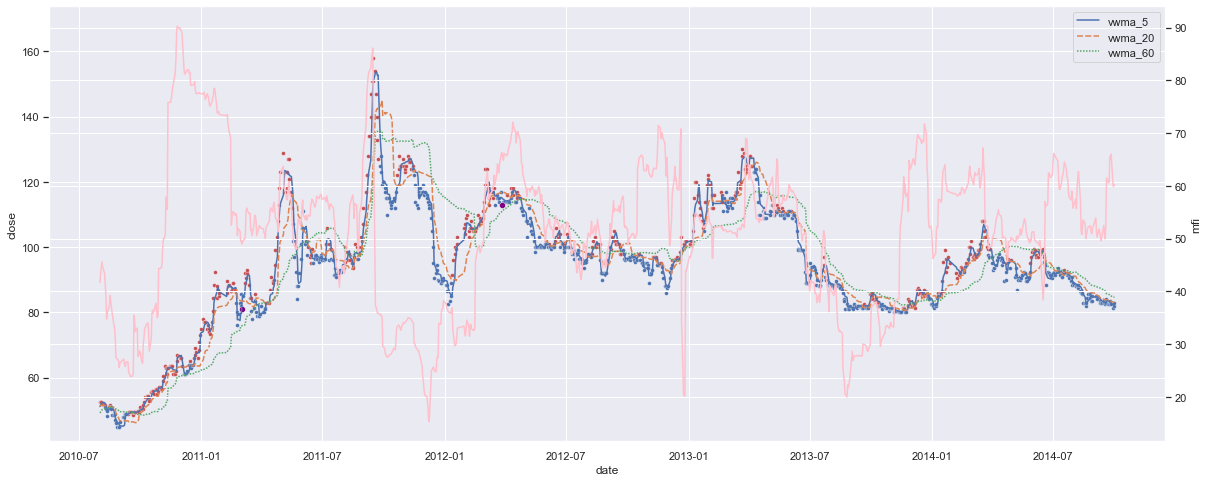

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
fig, ax1 = plt.subplots()
sns.set(rc={'figure.figsize':(20,8)})

sub  = ma.loc[start_date:end_date,:]
bull_period = sub.loc[sub['states']==0]
bear_period = sub.loc[sub['states']==1]

mini = sub['close'].min()*0.9
maxi= sub['close'].max()*1.1

sns.scatterplot(x='date', y='close', data=bear_period,color='r',s=15,ax=ax1)
sns.scatterplot(x='date', y='close', data=bull_period,color='b',s=15,ax=ax1)
sns.lineplot(data=sub[[i for i in cols if 'vwma' in i]], color="g",ax=ax1)
sns.move_legend(ax1, "upper right")
ax1.set(ylim=(mini,maxi))

ax2 = plt.twinx()
sns.lineplot(data=sub,x='date',y='mfi', color="pink", ax=ax2)

sell = sub.loc[~sub['sell'].isna(),'close']
sell_all = sub.loc[~sub['sell_all'].isna(),'close']
sns.scatterplot(data=sell, ax=ax1,color='purple')
sns.scatterplot(data=sell_all, ax=ax1,color='black')

In [40]:
## BULL MARKET


## BUY SIGNAL BASED on VWMA5 (BUY SIGNAL FROM HIGHER LAGS is DELAYED)
#### 1) BUY WHEN CLOSE IS UNDER VWMA, price has just dropped sharply and slows down  (SMALL NEGATIVE SLOPE)
##### 2) 

###### ALREADY SOLD ALL before the market transition into bear
## IN BEAR: YOU CAN SHORT (BUT CURRENTLY IN VN stock exchange, because of regulations... you cant short)
## OR YOU CAN BUY ALL AT THE BOTTOM. 
# 

bear = (ma['states'].shift(1)==1)#&(ma['states'].shift(2)==1)&(ma['states'].shift(3)==1)

###### BUY SMALl
close_under_vwma5 = (ma['diff_close_vwma5'].shift(1)<=-0.01)
# close_under_vwma20_any = (ma['diff_close_vwma20'].shift(1)<0)
slope_change = (ma['secondorder_slope_5'].shift(2)<=0)&(ma['secondorder_slope_5'].shift(1)>0)
close_under_vwma60_any = (ma['diff_close_vwma60'].shift(1)<0)&(ma['diff_close_vwma60'].shift(1)>=-0.1)
ma.loc[close_under_vwma5&slope_change&close_under_vwma60_any ,'buy'] = ma.loc[close_under_vwma5&close_under_vwma60_any&slope_change,'close']


###### BUY LARGE (NOT BUY ALL)
# ### THE smaller the lag, the steeper the slope 
# close_under_vwma5 = (ma['diff_close_vwma5'].shift(1)<=-0.01)
# close_under_vwma60_any = (ma['diff_close_vwma60'].shift(1)<=-0.2)
# pos_curvature_5 =  (ma['secondorder_slope_5'].shift(1)>0)
# neg_slope_5 =  (ma['slope_5'].shift(1)<=-0.16)
# ma.loc[bear&close_under_vwma5&pos_curvature_5&neg_slope_5&close_under_vwma60_any ,'buy_all'] = ma.loc[bear&close_under_vwma5&pos_curvature_5&neg_slope_5&close_under_vwma60_any,'close']

lowest_320_days =  (ma['close'].shift()==ma['close'].shift().rolling(window=960).min())&(ma['close'].shift()/ma['close'].shift(960)<0.66)
ma.loc[lowest_320_days,'buy_all'] =ma.loc[lowest_320_days,'close']


<Axes: xlabel='date', ylabel='close'>

<Figure size 1440x576 with 0 Axes>

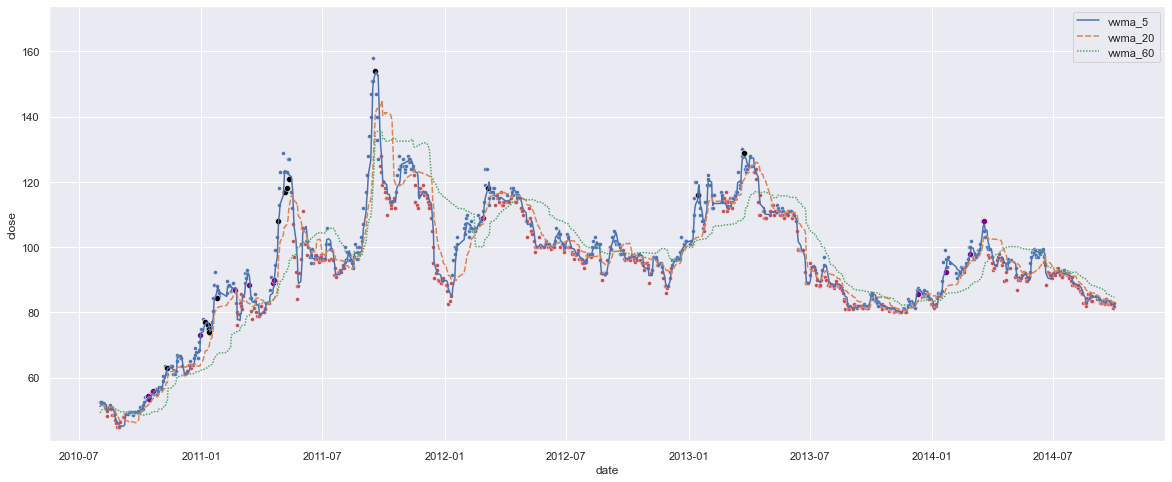

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
fig, ax1 = plt.subplots()
sns.set(rc={'figure.figsize':(20,8)})

sub  = ma.loc[start_date:end_date,:]
bull_period = sub.loc[sub['states']==0]
bear_period = sub.loc[sub['states']==1]

mini = sub['close'].min()*0.9
maxi= sub['close'].max()*1.1

sns.scatterplot(x='date', y='close', data=bear_period,color='r',s=15,ax=ax1)
sns.scatterplot(x='date', y='close', data=bull_period,color='b',s=15,ax=ax1)
sns.lineplot(data=sub[[i for i in cols if 'vwma' in i]], color="g",ax=ax1)
sns.move_legend(ax1, "upper right")
ax1.set(ylim=(mini,maxi))

sell = sub.loc[~sub['sell'].isna(),'close']
# buy = sub.loc[~sub['buy'].isna(),'close']
sell_all = sub.loc[~sub['sell_all'].isna(),'close']
# buy_all = sub.loc[~sub['buy_all'].isna(),'close']

sns.scatterplot(data=sell, ax=ax1,color='purple')
# sns.scatterplot(data=buy, ax=ax1,color='yellow')
sns.scatterplot(data=sell_all, ax=ax1,color='black')
# sns.scatterplot(data=buy_all, ax=ax1,color='green')
# sns.scatterplot(data=buy, ax=ax2,color='r')

In [42]:
def get_action(row):
    if row['sell_all']:
        return 'sell_all'
    if row['sell']:
        return 'sell'
    if row['buy']:
        return 'buy'
        
ma = ma.fillna("")
ma['action'] = ma.apply(lambda x: get_action(x),axis=1)
df = ma.loc['05-01-2019':,:]
df.head(20)
    

,mfi,states,open,close,vwma_5,vwma_20,vwma_60,slope_5,slope_20,slope_60,...,secondorder_slope_20,secondorder_slope_60,diff_close_vwma5,diff_close_vwma20,diff_close_vwma60,sell,sell_all,buy,buy_all,action
date,,,,,,,,,,,,,,,,,,,,,
2019-05-02,59.190175,0,87.0,88.5,87.898747,87.842180,86.288416,0.12,0.210,0.170000,...,0.115,0.021667,0.006840,0.007489,0.025630,,,,,None
2019-05-03,59.256618,0,88.7,88.6,88.118300,87.897432,86.369853,0.14,0.030,0.158333,...,-0.180,-0.011667,0.005467,0.007993,0.025821,,,,,None
2019-05-06,58.041060,1,88.4,87.0,88.052787,87.841714,86.565845,-0.20,-0.055,0.125000,...,-0.085,-0.033333,-0.011956,-0.009582,0.005015,,,,,None
2019-05-07,59.226784,0,87.0,87.9,88.046953,87.856545,86.645087,0.10,0.010,0.146667,...,0.065,0.021667,-0.001669,0.000495,0.014483,,,,,None
2019-05-08,58.803270,0,87.0,87.8,88.042378,87.850866,86.741312,0.18,0.000,0.168333,...,-0.010,0.021667,-0.002753,-0.000579,0.012205,,,,,None
2019-05-09,59.630838,0,87.8,87.7,87.929488,87.829280,86.827256,-0.16,-0.030,0.155000,...,-0.030,-0.013333,-0.002610,-0.001472,0.010051,,,,,None
2019-05-10,58.594619,1,87.1,87.5,87.737378,87.774259,86.921637,-0.22,-0.040,0.121667,...,-0.010,-0.033333,-0.002706,-0.003125,0.006654,,,,,None
2019-05-13,57.768984,1,87.5,86.7,87.684005,87.742814,86.986492,-0.06,-0.040,0.073333,...,0.000,-0.048333,-0.011222,-0.011885,-0.003294,,,,,None
2019-05-14,55.955801,1,84.1,86.5,87.450676,87.722929,87.023962,-0.28,-0.010,0.010000,...,0.030,-0.063333,-0.010871,-0.013941,-0.006021,,,86.5,,buy


In [43]:
### EACH TRADE USES 2% of total capital 
cash = 30000 ###( 30 million)
shares = 0
price_bought = 0
risk_free_return = (1+0.065)**(1/365)-1
total_capital = cash
queue = []

import random
import heapq as hq

##### BUY OPEN, SELL 
for i in range(0,len(df)):
    date = df.index[i]
    open_ = df.iloc[i]['open']
    close_  = df.iloc[i]['close']
    action_ = df.iloc[i]['action'] 
    trade_size = 0.02*total_capital
    
    if shares>0 and len(queue)>0:
        if action_=='sell_all':
            print("SELL_ALL")
            cash+=shares*open_
            shares = 0
        ##### DOESNT EXCEED RISK FREE RATE, but price is expected to go down today, so sell open 
        elif action_=='sell':
            sell_shares = hq.heappop(queue)
            cash+=sell_shares*open_
            shares -= sell_shares
    else:
        if action_ == 'buy':
            buy_shares = trade_size/close_
            hq.heappush(queue, buy_shares)
            shares += buy_shares
            cash -= trade_size
            price_bought = close_
    
    loss=(cash + shares*close_)/total_capital-1
    total_capital = cash + shares*close_
    if loss>0.001:
        print(date)
        print(loss)
    # print(date, "CAPITAL:",total_capital,"CASH:",cash,"SHARES:",shares,"action:",action_)
    # print("\n")
    # if i ==5:
        # break
        
print(total_capital)
#### EARLY 2020 HUGE DROP due to COVID, Moving Average alone cannot account for such an extreme event. Need news 
print(len(df))

SELL_ALL
2020-10-07
0.0013562858633280328
2020-10-09
0.001457624765738963
2020-10-13
0.0015929632579563258
2020-10-14
0.0017978771220135137
SELL_ALL
2021-04-14
0.0014605756915264667
2021-04-19
0.0015708451146716484
2022-01-19
0.0012043303530520078
2022-01-25
0.0013089005235602524
2022-02-15
0.0011636116413462627
2022-03-21
0.0010872840169249276
29894.63348417244
1074


In [45]:
(total_capital/30000 - 1)**(365/len(df)) - 1

C:\Users\admin\AppData\Local\Temp/ipykernel_2940/3761193495.py:1: RuntimeWarning: invalid value encountered in double_scalars
  (total_capital/30000 - 1)**(365/len(df)) - 1


nan

In [223]:
## TCB: 15% returns pa 
## ACB: -46% returns pa